Lambda School Data Science

*Unit 4, Sprint 2, Module 3*

---

# Neural Network Frameworks (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Implemenent Regularization Strategies
* <a href="#p2">Part 2</a>: Deploy a Keras Model
* <a href="#p3">Part 3</a>: Write a Custom Callback Function (Optional)

Today's class will also focus heavily on Callback objects. We will use a variety of callbacks to monitor and manipulate our models based on data that our model produces at the end of an epoch.

> A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). -- [Keras Documentation](https://keras.io/api/callbacks/)

# Regularization Strategies (Learn)

## Overview

Neural Networks are highly parameterized models and can be easily overfit to the training data. The most salient way to combat this problem is with regularization strategies.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/1920px-Regularization.svg.png)

There are four common ways of regularization in neural networks which we cover briefly. Here's a quick summary of how to apply them: 

1. Always use EarlyStopping. This strategy will prevent your weights from being updated well past the point of their peak usefulness.
2. Use EarlyStopping, Weight Decay and Dropout
3. Use EarlyStopping, Weight Constraint and Dropout

Weight Decay and Weigh Constraint accomplish similar purposes - preventing over fitting the parameters by regularizing the values. The mechanics are just slightly different. That's why you would not necessary want to apply them together.

## Follow Along

### Early Stopping

In [1]:
%load_ext tensorboard

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# load in our dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


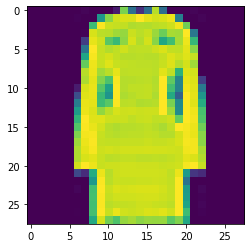

In [3]:
import matplotlib.pyplot as plt

image_id = 500
plt.imshow(X_train[image_id]);
# plt.imshow(X_train[image_id], cmap='gray'); # to display in gray scale

In [4]:
# normalize pixel values between 0 and 1 
max_pixel_value = 255
X_train, X_test = X_train /max_pixel_value , X_test / max_pixel_value

### Build a Neural Network that uses EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import ReLU
import tensorflow as tf
import os

# 1) Create 2 dir for logging files 
# create 2 dir -- one for tensorboard results and one for early stopping


# 2) Instantiate the callbacks 
# instantiate a tensorboard callback object


# instantiate a early stopping clallback object 
# docs: https://keras.io/api/callbacks/early_stopping/


# 3) Build the model 

# instantiate Sequential class

# flatten images 

# hidden layer 1

# act func 1

# hidden layer 2

# act func 2

# hidden layer 3

# act func 3

# output layer 

# complie model 

# fit model 




# create 2 dir -- one for tensorboard results and one for early stopping
logdir = os.path.join("logs", "EarlyStopping-Loss") 

# instantiate a tensorboard callback object 
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# instantiate a early stopping clallback object 
# docs: https://keras.io/api/callbacks/early_stopping/
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = tf.keras.Sequential([
    # takes 2D image and flattens into a row vector                         
    Flatten(input_shape=(28,28)),
    
    Dense(128), # hidden layer 1 
    ReLU(negative_slope=0.01), # act func 1
    
    Dense(128), # hidden layer 2 
    ReLU(negative_slope=.01), # act func 2 
    
    Dense(128), # hidden layer 3 
    ReLU(negative_slope=.01), # act func 3 
    
    Dense(10, activation='softmax') # output layer, use softmax for classification of labels greater than 2 
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='nadam', 
              metrics=['accuracy'])


model.fit(X_train, y_train, 
          epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4734 - accuracy: 0.8282 - val_loss: 0.4015 - val_accuracy: 0.8537
Epoch 2/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3547 - accuracy: 0.8689 - val_loss: 0.4072 - val_accuracy: 0.8472
Epoch 3/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3192 - accuracy: 0.8818 - val_loss: 0.3627 - val_accuracy: 0.8699
Epoch 4/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2969 - accuracy: 0.8895 - val_loss: 0.3427 - val_accuracy: 0.8772
Epoch 5/99
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2817 - accuracy: 0.8951 - val_loss: 0.3523 - val_accuracy: 0.8744
Epoch 6/99
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2682 - accuracy: 0.8993 - val_loss: 0.3585 - val_accuracy: 0.8756
Epoch 7/99
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2567 - accuracy: 0.9036 - val_loss: 0.3421 - val_accuracy

In [ ]:
model.evaluate(X_test, y_test) # this is not the best in case you want the best 
# weight do the EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, 
# restore_best_weights=False); restore_best_weights=False is important to note

# another one callback best one to use is ModelCheckPoint

313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8800


[0.3420729637145996, 0.8799999952316284]

In [ ]:
# Clear any logs from previous runs
# !rm -rf ./logs/

In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

---

### Weight Decay (a.k.a Weight Shrinkage)

```python
Dense(64, input_dim=64,
            kernel_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l1(0.01)))
```

![](https://qph.fs.quoracdn.net/main-qimg-9d0dbf8074761b541ba80543ddfc9f73.webp)

In the above image with the blue diamond and circle remember that: 

1. The X and Y axis represent possible values for model weights, in the case of this visualization we have w1 and w2. 
2. The red dot represents the trangent line (the point of contact) between the error surface (represented by the contour map) and the unit weights (represented by the blue shapes). 
3. The red dot also tells us the weight values at the point of contact. 
4. What determines the geometry of the blue shapes are their respective distance metrics. 
5. The norm of the weights determines where the point of contact will occur. And the norm of the weights is determined by which metric space **p** we are getting the norm equation from. 

$${\displaystyle \left\|x\right\|_{p}=\left(|x_{1}|^{p}+|x_{2}|^{p}+\dotsb +|x_{n}|^{p}\right)^{1/p}.}$$  

## Regularization Take Aways

Almost remenber that:

1. Ridge (l2) and Lasso (l1) are 2 out of possibily infinitly many ways to regularize a model by [**using a distiance metric in Lp space.**](https://en.wikipedia.org/wiki/Lp_space) 

2. Both L2 and L1 are used to help prevent overfitting. 

3. **The key difference between L1 and L2** is that L1 will calcualte zero valued feature weights (i.e. **w = 0**) for a subset of features; usually because redundent information is encoded in that subset of features; mathematically, this is refered to as [**MultiCollinearity**](https://en.wikipedia.org/wiki/Multicollinearity). Where as L2 will shrink the value of all feature weights but almost never down to zero. 

**Take Away: L1 drops features while L2 shrinks them and keeps them**



![](https://i.stack.imgur.com/4KSgs.png)

The above image shows us the geometry of 4 specific Lp spaces. 

### Build a Neural Net using  $L^p$ regularization

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm

# build a 3 hidden layer NN using Lp regularization and using both tensorboard and early stopping callbacks 
# create 2 dir -- one for tensorboard results and one for early stopping
logdir = os.path.join("logs", "Weight-Decay-Loss") 

# instantiate a tensorboard callback object 
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# instantiate a early stopping clallback object 
# docs: https://keras.io/api/callbacks/early_stopping/
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

model = tf.keras.Sequential([
    # takes 2D image and flattens into a row vector                         
    Flatten(input_shape=(28,28)),
    
    Dense(128, kernel_regularizer=regularizers.l2(0.01)), # hidden layer 1 
    ReLU(negative_slope=0.01), # act func 1
    
    Dense(128, kernel_regularizer=regularizers.l2(0.01)), # hidden layer 2 
    ReLU(negative_slope=.01), # act func 2 
    
    Dense(128, kernel_regularizer=regularizers.l2(0.01)), # hidden layer 3 
    ReLU(negative_slope=.01), # act func 3 
    
    Dense(10, activation='softmax') # output layer, use softmax for classification of labels greater than 2 
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='nadam', 
              metrics=['accuracy'])


model.fit(X_train, y_train, 
          epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

In [ ]:
model.summary()

In [ ]:
%tensorboard --logdir logs

----

### Weight Constraint

```python
tf.keras.constraints.MaxNorm(
    max_value=2, axis=0
)
```

![](https://qph.fs.quoracdn.net/main-qimg-9d0dbf8074761b541ba80543ddfc9f73.webp)

What the weight constraint does is provide a maximum value for the normalized value of these weight norm shapes (represented by the mathematical notation at the buttom of each blue shape. The subscript (or superscript) indicates which $L^p$ space that norm was calculated in.

$${\displaystyle \left\|x\right\|_{p}=\left(|x_{1}|^{p}+|x_{2}|^{p}+\dotsb +|x_{n}|^{p}\right)^{1/p}.}$$  

In [ ]:
from tensorflow.keras.constraints import MaxNorm 

from tensorflow.keras.constraints import MaxNorm

# build a 3 hidden layer NN using Lp regularization and using both tensorboard and early stopping callbacks 

# build a 3 hidden layer NN using Lp regularization and using both tensorboard and early stopping callbacks 
# create 2 dir -- one for tensorboard results and one for early stopping
logdir = os.path.join("logs", "MaxNorm-Loss") 

# instantiate a tensorboard callback object 
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# instantiate a early stopping clallback object 
# docs: https://keras.io/api/callbacks/early_stopping/
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, restore_best_weights=True)

# weight constraint
wc = MaxNorm(max_value=2)

model = tf.keras.Sequential([
    # takes 2D image and flattens into a row vector                         
    Flatten(input_shape=(28,28)),
    
    Dense(128, kernel_constraint=wc), # hidden layer 1 
    ReLU(negative_slope=0.01), # act func 1
    
    Dense(128, kernel_constraint=wc), # hidden layer 2 
    ReLU(negative_slope=.01), # act func 2 
    
    Dense(128, kernel_constraint=wc), # hidden layer 3 
    ReLU(negative_slope=.01), # act func 3 
    
    Dense(10, activation='softmax') # output layer, use softmax for classification of labels greater than 2 
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='nadam', 
              metrics=['accuracy'])


model.fit(X_train, y_train, 
          epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

In [ ]:
%tensorboard --logdir logs

-----
### Dropout

![](https://miro.medium.com/max/981/1*EinUlWw1n8vbcLyT0zx4gw.png)

If interested, feel free to read through the original publication on [**Drop Out**](https://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf). 

**Key Take aways:** 

1. During training, dropout will probabilistically "turn off" some neurons in the layer that dropout is implemented in. 
2. During inference (ie. making predictions on the test set) all neurons are used (i.e. no dropout is applied).
3. Dropout works best when used with MaxNorm

Here are some articel excepts on how dropout works. 

"Dropout can be interpreted as a way of regularizing a neural network by adding noise to
its hidden units." (page 2)

"Combining several models [model ensembles] is most
helpful when the individual models are different from each other and in order to make
neural net models different, they should either have different architectures or be trained
on different data...It prevents overfitting and
provides a way of approximately combining exponentially many different neural network
architectures efficiently." (page 2)

"Training the **norm of the incoming weight vector** at each hidden unit to be upper
bounded by a fixed constant c. In other words, if w represents the vector of weights incident
on any hidden unit, the neural network was optimized under the constraint **||w||2 ≤ c**. 

This constraint was imposed during optimization by **projecting w onto the surface of a ball of
radius c, whenever w went out of it**. This is also called **max-norm regularization** since it
implies that the maximum value that the norm of any weight can take is c. The constant
c is a tunable hyperparameter, which is determined using a validation set." (page 6)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
%tensorboard --logdir logs

## Challenge

You will apply regularization strategies inside your neural network today, as you try to avoid overfitting it. 

---

# Deploy (Learn)

## Overview

You've built a dope image classification model, but it's just sitting your Jupyter Notebook. What now? Well you deploy to some down stream application. TensorFlow supports three ways of deploying it's models: 

- In-Browswer with TensorFlow.js
- API with TensorFlow Serving (TFX) or another Framework
- On-Device with TensorFlow Lite

You are already familiar with deploying a model as an API from Unit 3, so we will focus on deploying a model in browser. Both methods rely on the same core idea: save your weights and architecture information, load those parameters into application, and perform inference. 



## Follow Along

### Checkpoint
Save the latest weights of your model at the end of each epoch

In [ ]:
import tensorflow as tf

cpoint = tf.keras.callbacks.ModelCheckpoint("weights_best.h5",
                                            verbose=1, 
                                            save_weights_only=True)

def create_model():

    model = tf.keras.Sequential([
          Flatten(input_shape=(28,28)),
          Dense(128),
          ReLU(negative_slope=.01),
          Dense(128),
          ReLU(negative_slope=.01),
          Dense(128),
          ReLU(negative_slope=.01),
          Dense(10, activation='softmax')
        ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

    return model

model = create_model()

model.fit(X_train, y_train, epochs=2, 
          validation_data=(X_test,y_test),
          verbose=2,
          callbacks=[cpoint])

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
# create a complied model and return it 


m = create_model()
m.load_weights('./weights_best.h5')

m.summary()

In [ ]:
m.evaluate(X_test, y_test)

### Save Entire Model
This method includes both the weights and architecture

In [ ]:
# Create and train a new model instance.
model = create_model()
model.fit(X_train,y_train, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Load a fresh model:

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

In [ ]:
new_model.evaluate(X_test, y_test)

In [ ]:
model.evaluate(X_test, y_test)

## Challenge

You will be expected to be able to export your model weights and architecutre on the assignment.

# Custom Callbacks (Learn)

## Overview

Custom callbacks all you to access data at any point during the training: on batch end, on epoch end, on epoch start, on batch start. Our use case today is a simple one. Let's stop training once we reach a benchmark accuracy.

## Follow Along

## Challenge

Experiment with improving our custom callback function. 